In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import subprocess

### Settings

In [55]:
#stuff to play with
lmod = "1" #linkage model : 0 = LM, 1 = LT, 2 LF

#(almost) set in stone
algo = "./uhv_gomea" #which executable to use
pro = "35" #problem index
rnd = "1234" #random seed
wrp = "./"

# to keep in line with the others
ssize = "100" #solution set size
low = "-1000" #lower init bound
upp = "1000" #upper init bound
pop = "1000" #population size
ela = "1000" #elitist archive size target
eva = "100000000" #maximum number of MO evaluations
sec = "3600" #time limit
K = 10

#not used
vtr = "123" #value to reach (unsure if we should use or not)
dim = str(3 * K) #number of parameters

### Run algorithm (duurt ffkes)

In [53]:
#command = np.array(["./uhv_gomea", "-s", "-e", " -v", "1", "35", "3" "15", "-5",
#       "5", "100", "1000", "1000000", "60", "120.7876", "1234",  "./"])
  
command = np.array([algo, "-s", "-e", "-v", lmod, pro, dim, ssize, 
low, upp, pop, ela, eva, sec, vtr, rnd, wrp])    
subprocess.run(command, capture_output=True)


CompletedProcess(args=array(['./uhv_gomea', '-s', '-e', '-v', '1', '35', '30', '50', '-1000',
       '1000', '100', '1000', '10000000', '360', '123', '1234', './'],
      dtype='<U11'), returncode=0, stdout=b'-0.552959 -0.3438 -0.315278 -0.427625 -0.35078 -0.549472 0.115988 -0.38296 0.0784244 -0.50815 -2.75713 -4.75772 -18.1433 -2.72391 -2.73111 -2.75813 -968.423 -2.2943 -543.637 -2.79049 1.17241 -7.84895 -811.666 -1.48283 -1.11324 -1.28014 118.91 1.37167 -3.74852 -1.1254 TEST:\n156.661\n0.155567\nProblem settings:\n\tfunction_name = RadReg\n\tproblem_index = 35\n\tmo_number_of_parameters = 30\n\tinit_range = [-1000, 1000]\n\tHV reference point = 200, 200\nRun settings:\n\tmax_number_of_MO_evaluations = 10000000\n\tmaximum_number_of_seconds = 360\n\tuse_vtr = 0\n\tvtr = 123\nArchive settings:\n\tCollect all MO-sol in archive = yes\n\tElitist_archive_target_size = 1000\n\tApproximation_set_size = 1000\nOptimizer settings: \n\tSOHV\n\tlocal_optimizer_index = 66\n\ttest_points = 50\n\tnum

### Process data and show plots

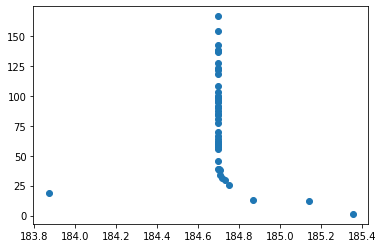

In [54]:
# path to statistics file
path1 = "".join("./statistics_UVHGOMEA_lmod" + lmod + "_problem" 
+ pro + "_p" + ssize + "_run" + rnd + ".dat")

#path to pareto front file
path2 = "".join("./best_final_UVHGOMEA_lmod" + lmod + "_problem" + pro
+ "_p" + ssize + "_run" + rnd + ".dat")

df = pd.read_csv(path1, delim_whitespace=True)
data = np.genfromtxt(path2, delimiter='')

#print(data)
df.head()
data_conc = np.zeros((len(data[:,0]),2))
data_conc[:,0] = data[:,0]
data_conc[:,1] = data[:,1]

#print(data_conc)

plt.plot(data_conc[:,0],data_conc[:,1],'o')

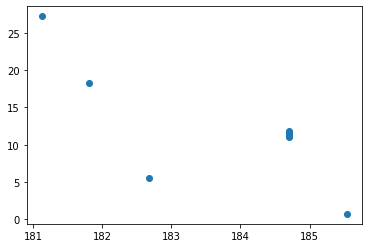

In [28]:
data_conc = np.zeros((len(data[:,0]),2))
data_conc[:,0] = data[:,0]
data_conc[:,1] = data[:,1]

#print(data_conc)

plt.plot(data_conc[:,0],data_conc[:,1],'o')
#plt.plot(data_conc[:,1],data_conc[:,0],'o')

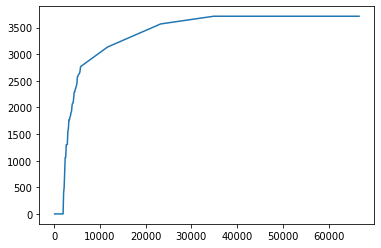

In [29]:
#plt.plot(df.Evals, -1*df['Best-f'])
plt.plot(df.Evals, df['Best-HV'])